##PRESENTATION LINK
https://drive.google.com/file/d/1E0fJO-4C2D-LBYMW8BK8Uzo00HrX1ZBC/view?usp=share_link

In [ ]:
!pip install medmnist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 KB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116949 sha256=48599504496165e4cbd23bdfa10ad26f1101e727fe890877e7419744eea544a5
  Stored in directory: /root/.cache/pip/wheels/5b/eb/43/7295e71293b218ddfd627f935229bf54af9018add7fbb5aac6
Successfully built fire


#IMPORTING STATEMENTS

In [ ]:
from tqdm import tqdm
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms

import medmnist
from medmnist import INFO, Evaluator

In [ ]:
print(f"MedMNIST v{medmnist.__version__} @ {medmnist.HOMEPAGE}")

MedMNIST v2.1.0 @ https://github.com/MedMNIST/MedMNIST/


In [ ]:
data_flag = 'pneumoniamnist'
download = True

NUM_EPOCHS = 3
BATCH_SIZE = 128
lr = 0.001

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])

#PREPROCESSING

In [ ]:
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

#LOAD THE DATA

In [ ]:
train_dataset = DataClass(split='train', transform=data_transform, download=download)
test_dataset = DataClass(split='test', transform=data_transform, download=download)

pil_dataset = DataClass(split='train', download=download)

  0%|          | 0/4170669 [00:00<?, ?it/s]

Using downloaded and verified file: /root/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /root/.medmnist/pneumoniamnist.npz


#ENCAPSULATE DATA INTO DATALOADER FORM

In [ ]:
train_loader = data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
train_loader_at_eval = data.DataLoader(dataset=train_dataset, batch_size=2*BATCH_SIZE, shuffle=False)
test_loader = data.DataLoader(dataset=test_dataset, batch_size=2*BATCH_SIZE, shuffle=False)

In [ ]:
print(train_dataset)
print("===================")
print(test_dataset)

Dataset PneumoniaMNIST (pneumoniamnist)
    Number of datapoints: 4708
    Root location: /root/.medmnist
    Split: train
    Task: binary-class
    Number of channels: 1
    Meaning of labels: {'0': 'normal', '1': 'pneumonia'}
    Number of samples: {'train': 4708, 'val': 524, 'test': 624}
    Description: The PneumoniaMNIST is based on a prior dataset of 5,856 pediatric chest X-Ray images. The task is binary-class classification of pneumonia against normal. We split the source training set with a ratio of 9:1 into training and validation set and use its source validation set as the test set. The source images are gray-scale, and their sizes are (384−2,916)×(127−2,713). We center-crop the images and resize them into 1×28×28.
    License: CC BY 4.0
Dataset PneumoniaMNIST (pneumoniamnist)
    Number of datapoints: 624
    Root location: /root/.medmnist
    Split: test
    Task: binary-class
    Number of channels: 1
    Meaning of labels: {'0': 'normal', '1': 'pneumonia'}
    Number of

#VISUALIZING TRANING DATASET

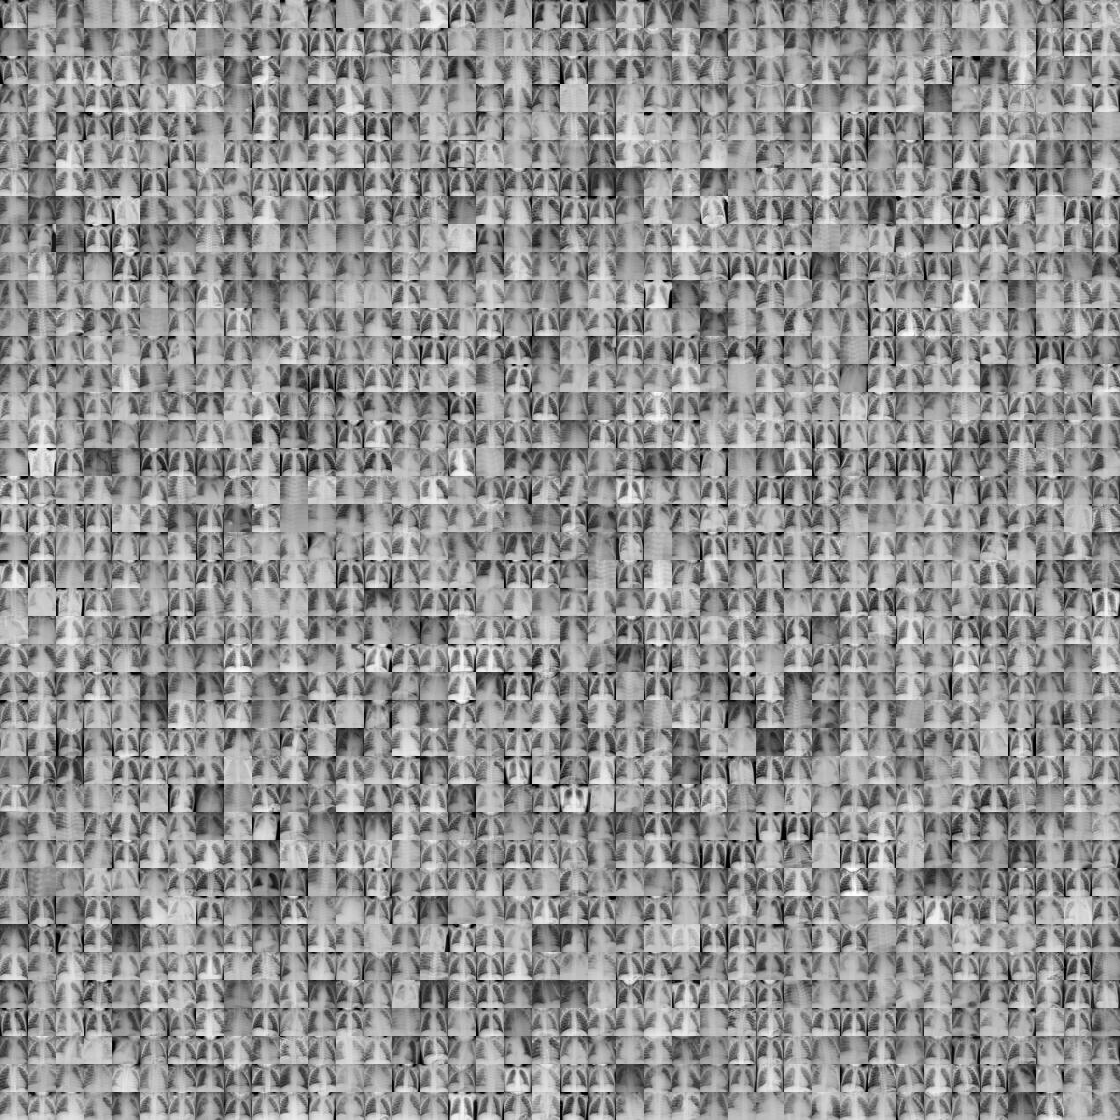

In [ ]:
train_dataset.montage(length=40)

#VISUALIZING TESTING DATASET

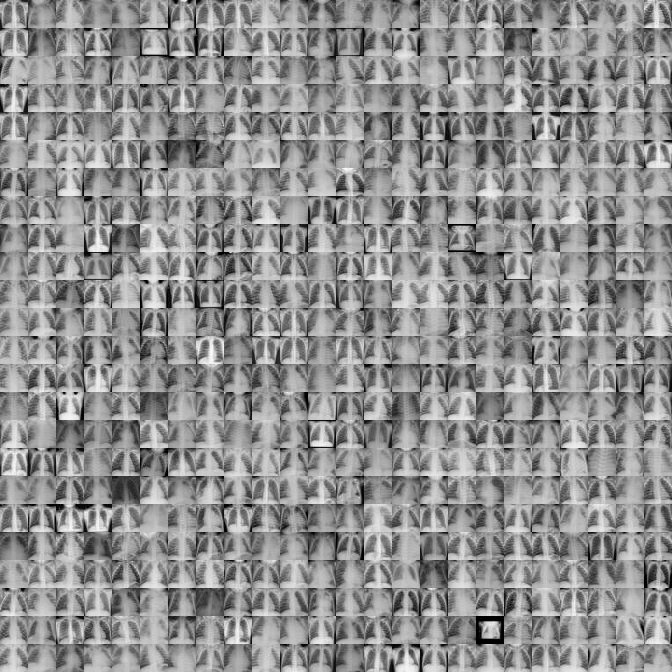

In [ ]:
test_dataset.montage(length=24)

#ARCHITECTURE

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [ ]:
n_epochs=3
log_interval=10
learning_rate = 0.01
momentum = 0.5
batch_size_train = 6
batch_size_test = 1000

##SELECTING SGD OPTIMIZER

In [ ]:
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)

#TRAINING AND VALIDATION

##TRAIN AND TEST LOADER

In [ ]:
import torch
import torchvision

In [ ]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /files/MNIST/raw/train-images-idx3-ubyte.gz to /files/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /files/MNIST/raw/train-labels-idx1-ubyte.gz to /files/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /files/MNIST/raw/t10k-images-idx3-ubyte.gz to /files/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /files/MNIST/raw/t10k-labels-idx1-ubyte.gz to /files/MNIST/raw



In [ ]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

##TRAINING

In [ ]:
def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      torch.save(network.state_dict(), 'model.pth')
      torch.save(optimizer.state_dict(), 'optimizer.pth')

##TESTING

In [ ]:
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [ ]:
# test()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

<ipython-input-12-6c2218f37724>:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.326476
Train Epoch: 1 [60/60000 (0%)]	Loss: 2.331107
Train Epoch: 1 [120/60000 (0%)]	Loss: 2.266910
Train Epoch: 1 [180/60000 (0%)]	Loss: 2.400591
Train Epoch: 1 [240/60000 (0%)]	Loss: 2.382214
Train Epoch: 1 [300/60000 (0%)]	Loss: 2.156308
Train Epoch: 1 [360/60000 (1%)]	Loss: 2.319981
Train Epoch: 1 [420/60000 (1%)]	Loss: 2.374133
Train Epoch: 1 [480/60000 (1%)]	Loss: 2.267103
Train Epoch: 1 [540/60000 (1%)]	Loss: 2.385307
Train Epoch: 1 [600/60000 (1%)]	Loss: 2.358114
Train Epoch: 1 [660/60000 (1%)]	Loss: 2.178821
Train Epoch: 1 [720/60000 (1%)]	Loss: 2.397832
Train Epoch: 1 [780/60000 (1%)]	Loss: 1.918297
Train Epoch: 1 [840/60000 (1%)]	Loss: 2.307798
Train Epoch: 1 [900/60000 (2%)]	Loss: 2.297530
Train Epoch: 1 [960/60000 (2%)]	Loss: 1.873387
Train Epoch: 1 [1020/60000 (2%)]	Loss: 1.774842
Train Epoch: 1 [1080/60000 (2%)]	Loss: 1.895880
Train Epoch: 1 [1140/60000 (2%)]	Loss: 1.705888
Train Epoch: 1 [1200/60000 (2%)]	Loss: 1.306411
Train Epoch:

/usr/local/lib/python3.8/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 0.0927, Accuracy: 9720/10000 (97%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.359355
Train Epoch: 2 [60/60000 (0%)]	Loss: 0.059694
Train Epoch: 2 [120/60000 (0%)]	Loss: 1.149992
Train Epoch: 2 [180/60000 (0%)]	Loss: 0.101289
Train Epoch: 2 [240/60000 (0%)]	Loss: 0.117065
Train Epoch: 2 [300/60000 (0%)]	Loss: 0.218818
Train Epoch: 2 [360/60000 (1%)]	Loss: 0.034187
Train Epoch: 2 [420/60000 (1%)]	Loss: 0.034243
Train Epoch: 2 [480/60000 (1%)]	Loss: 0.131110
Train Epoch: 2 [540/60000 (1%)]	Loss: 0.043787
Train Epoch: 2 [600/60000 (1%)]	Loss: 0.699397
Train Epoch: 2 [660/60000 (1%)]	Loss: 0.019739
Train Epoch: 2 [720/60000 (1%)]	Loss: 0.003873
Train Epoch: 2 [780/60000 (1%)]	Loss: 0.025632
Train Epoch: 2 [840/60000 (1%)]	Loss: 0.909400
Train Epoch: 2 [900/60000 (2%)]	Loss: 0.009783
Train Epoch: 2 [960/60000 (2%)]	Loss: 0.150901
Train Epoch: 2 [1020/60000 (2%)]	Loss: 0.190473
Train Epoch: 2 [1080/60000 (2%)]	Loss: 0.064200
Train Epoch: 2 [1140/60000 (2%)]	Loss: 0.086319
Tr

#EVALUATION OF MODEL PERFORMANCE

In [ ]:
import matplotlib.pyplot as plt

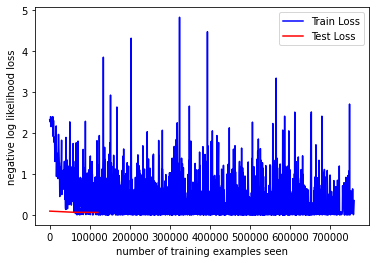

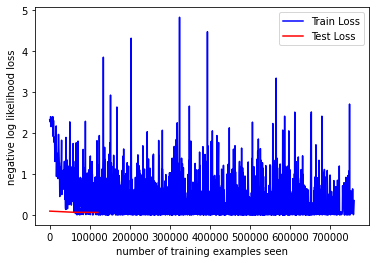

In [ ]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.plot(test_counter[:-1], test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig